In [9]:
# Підключаємо датасет й імпортуємо бібліотеки.
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt

In [10]:
def load_data():
    # Завантажуємо дані x_train и x_test які містять двовимірний масив із зображенням цифр
    # x_test, y_test масив з даними для перевірки.
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    # Трансформуємо з двовимірного масиву у тривимірний масив(28х28х1 канал)
    x_train = x_train.reshape(60000, 28, 28, 1)
    x_test = x_test.reshape(10000, 28, 28, 1)
    return x_train, y_train, x_test, y_test

In [11]:
def visualization(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

Epoch 1/50
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0862 - accuracy: 0.5501 - val_loss: 0.0615 - val_accuracy: 0.6742
Epoch 2/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0617 - accuracy: 0.6712 - val_loss: 0.0598 - val_accuracy: 0.6791
Epoch 3/50
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0451 - accuracy: 0.7503 - val_loss: 0.0245 - val_accuracy: 0.8633
Epoch 4/50
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0237 - accuracy: 0.8672 - val_loss: 0.0222 - val_accuracy: 0.8744
Epoch 5/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0216 - accuracy: 0.8766 - val_loss: 0.0203 - val_accuracy: 0.8823
Epoch 6/50
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0133 - accuracy: 0.9199 - val_loss: 0.0067 - val_accuracy: 0.9568
Epoch 7/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0057 - accuracy: 0.9647 - val_loss: 0.0053 -

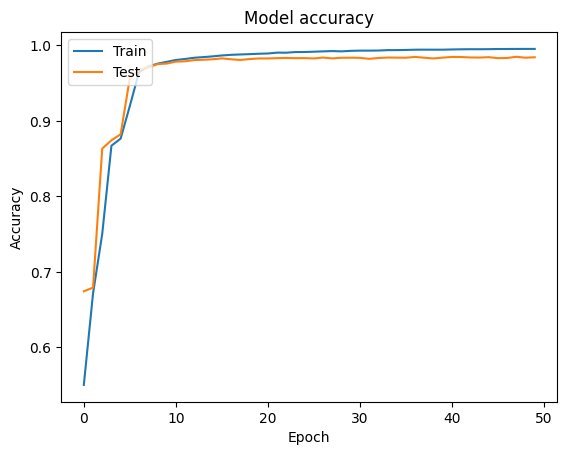

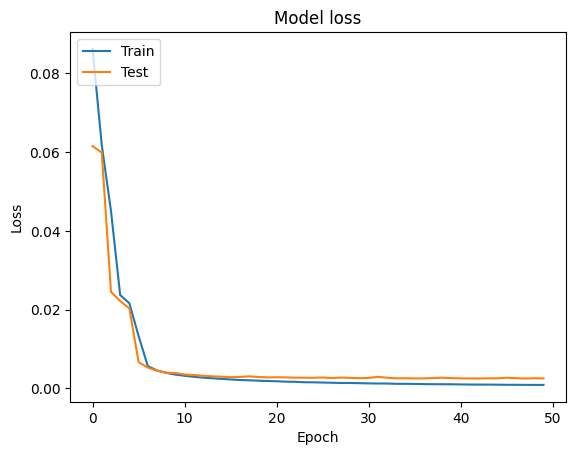

In [12]:
if __name__ == '__main__':
    x_train, y_train, x_test, y_test = load_data()

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    # створення моделі
    model = Sequential()
    # Перший згортковий шар
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))  # Додайте MaxPooling2D шар

    # Другий згортковий шар
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)) ) # Додайте MaxPooling2D шар

    # Створюємо вектор для повнозв'язної мережі
    model.add(Flatten())
    # Створюємо одношаровий перцептрон
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])  
    

    # Plot training & validation accuracy values
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)
    visualization(history)

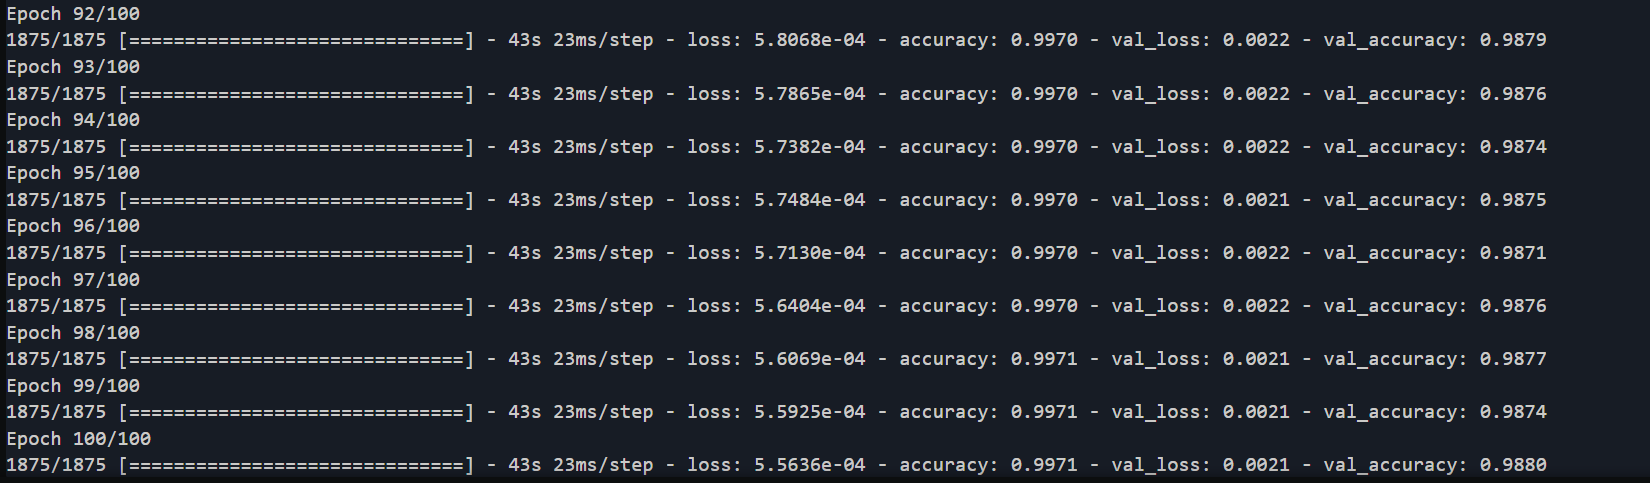

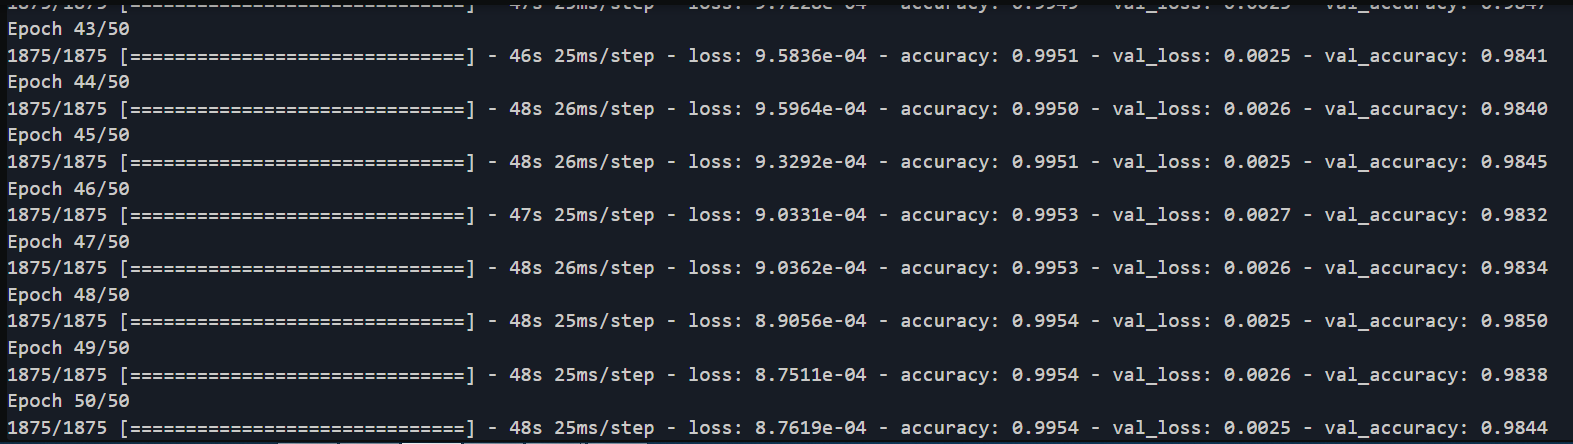